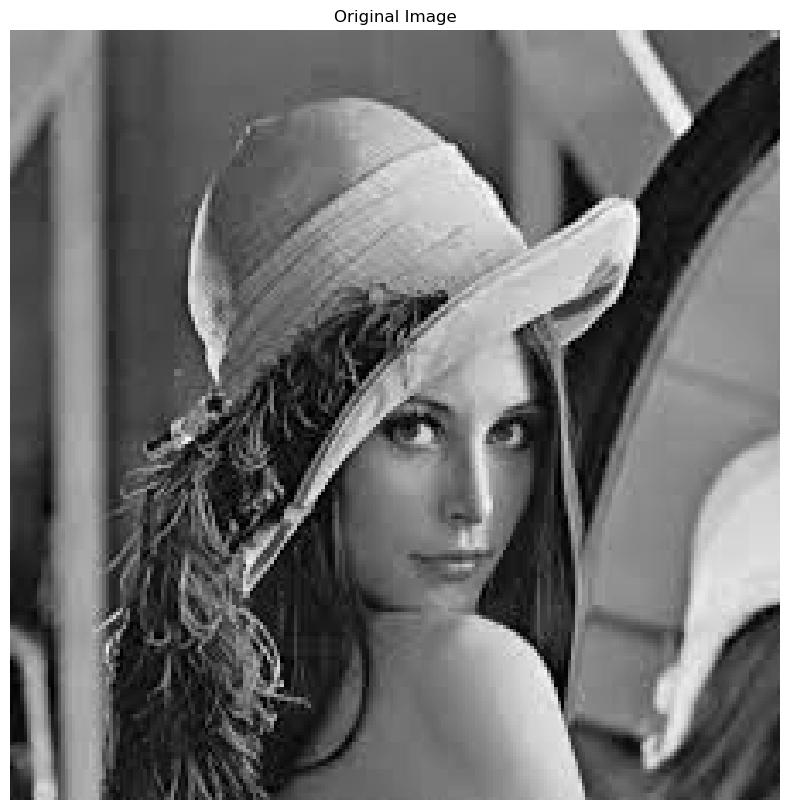

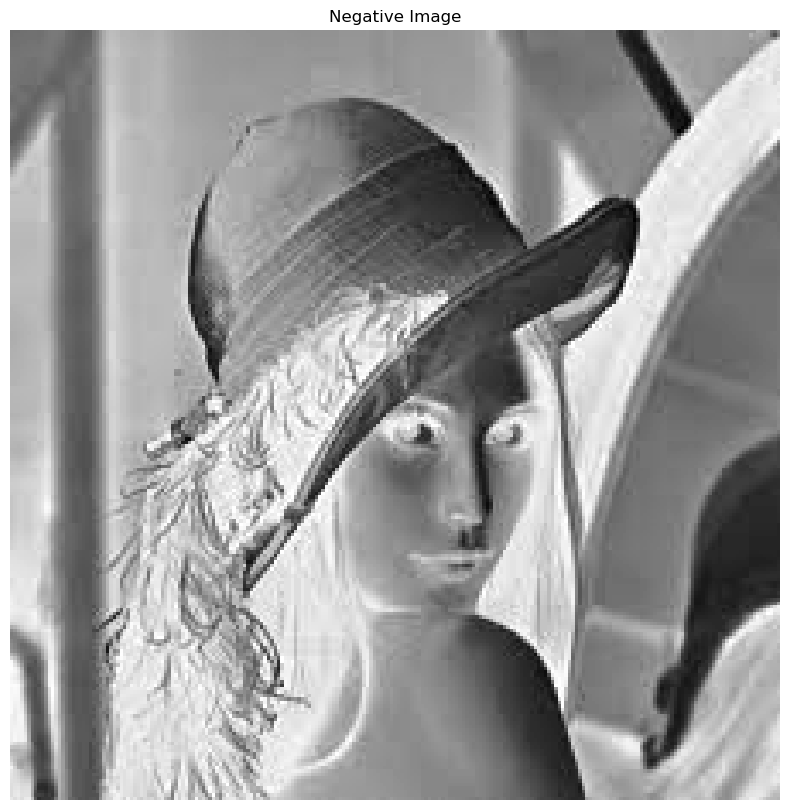

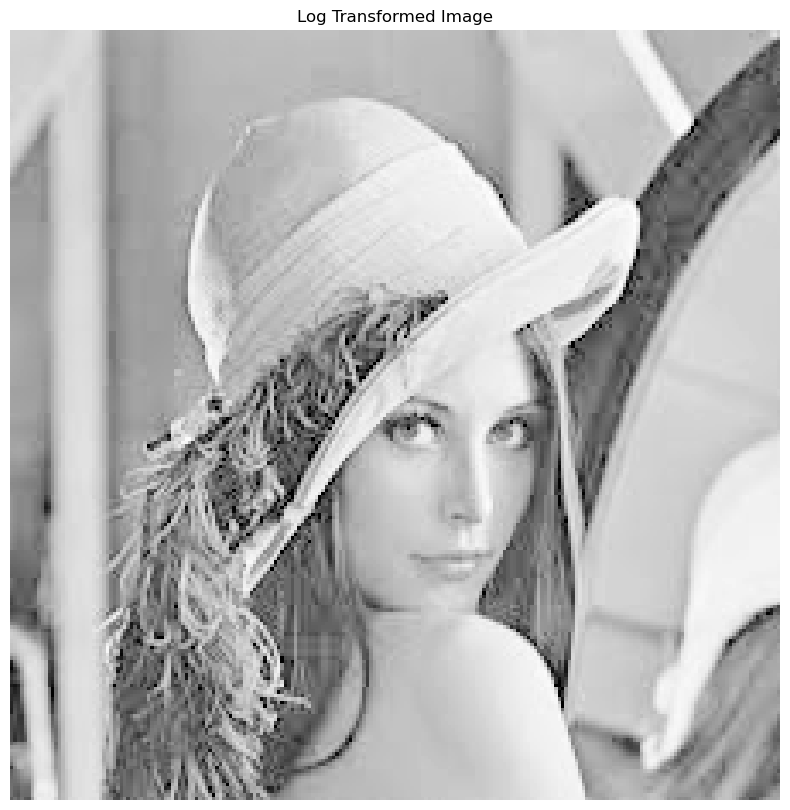

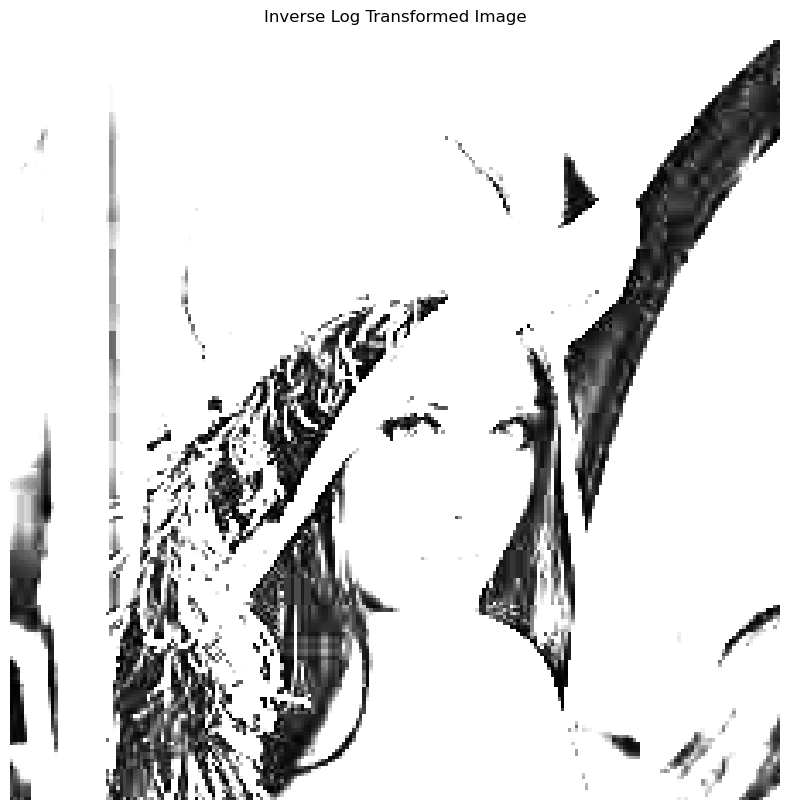

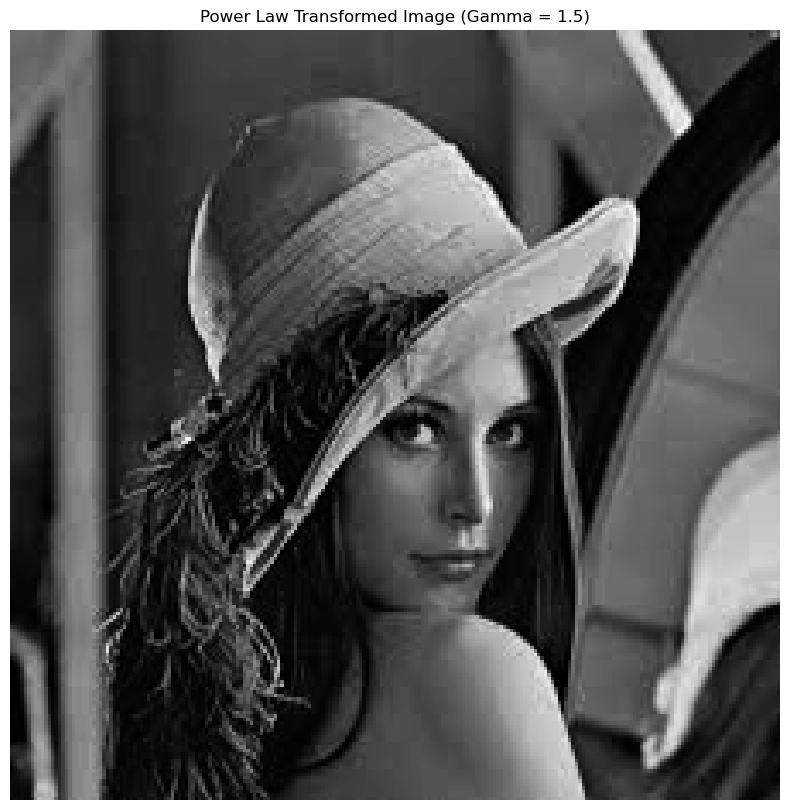

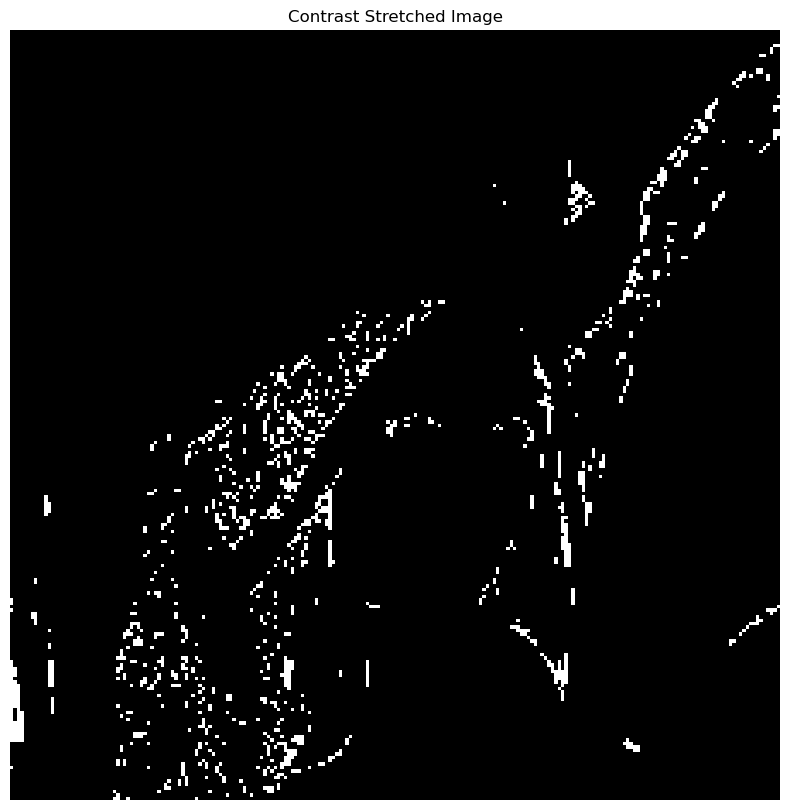

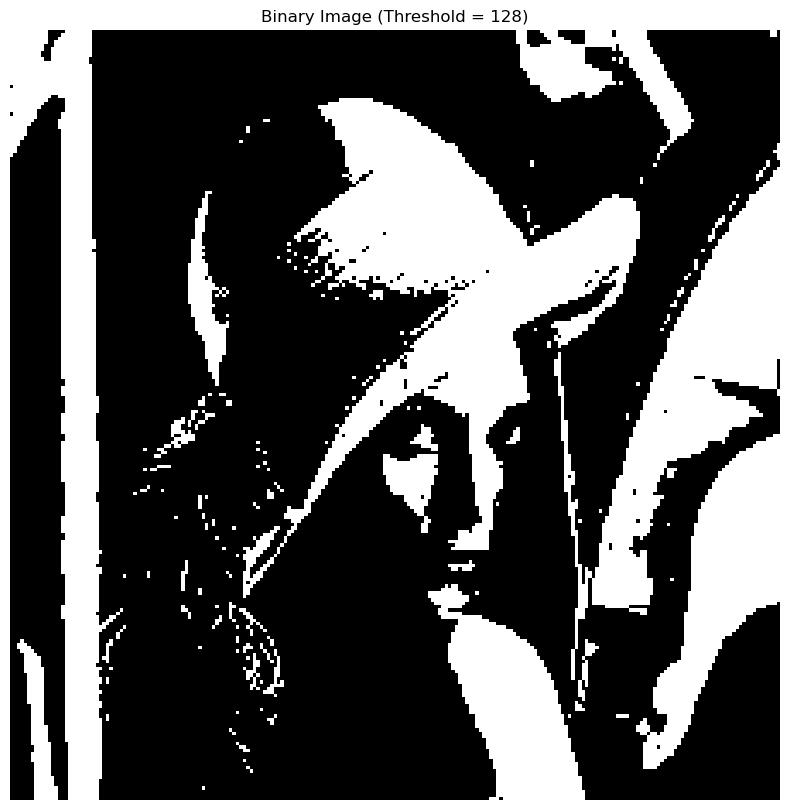

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "C:/Users/kavit/Lena.jpg" 
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError(f"Image file at path '{img_path}' not found or cannot be opened.")

plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# a. Image Negative
negative_img = 255 - img
plt.figure(figsize=(10, 10))
plt.imshow(negative_img, cmap='gray')
plt.title('Negative Image')
plt.axis('off')
plt.show()

# b. Log Transformation and Inverse Log Transform
c = 10
log_img = np.log1p(img / c)
log_img = np.uint8(255 * (log_img / np.max(log_img)))
plt.figure(figsize=(10, 10))
plt.imshow(log_img, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')
plt.show()

inverse_log_img = np.expm1(log_img / 255 * c)
inverse_log_img = np.uint8(np.clip(inverse_log_img, 0, 255))
plt.figure(figsize=(10, 10))
plt.imshow(inverse_log_img, cmap='gray')
plt.title('Inverse Log Transformed Image')
plt.axis('off')
plt.show()

# c. Power Law Transformation
gamma = 1.5
power_law_img = np.power(img / 255.0, gamma) * 255
# Ensure values are within [0, 255]
power_law_img = np.uint8(np.clip(power_law_img, 0, 255))
plt.figure(figsize=(10, 10))
plt.imshow(power_law_img, cmap='gray')
plt.title(f'Power Law Transformed Image (Gamma = {gamma})')
plt.axis('off')
plt.show()

# d. Contrast Stretching
min_val = np.min(img)
max_val = np.max(img)
stretched_img = np.clip((img - min_val) * 255 / (max_val - min_val), 0, 255).astype(np.uint8)
plt.figure(figsize=(10, 10))
plt.imshow(stretched_img, cmap='gray')
plt.title('Contrast Stretched Image')
plt.axis('off')
plt.show()

# e. Gray Level Slicing
threshold = 128
binary_img = np.where(img > threshold, 255, 0).astype(np.uint8)
plt.figure(figsize=(10, 10))
plt.imshow(binary_img, cmap='gray')
plt.title(f'Binary Image (Threshold = {threshold})')
plt.axis('off')
plt.show()

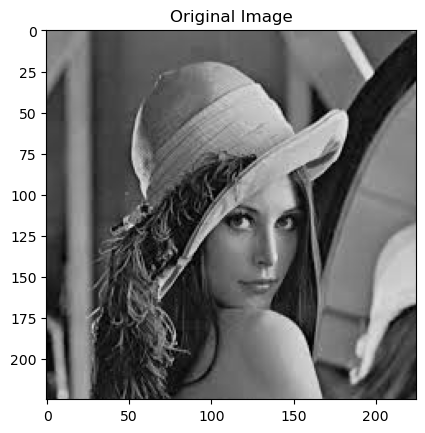

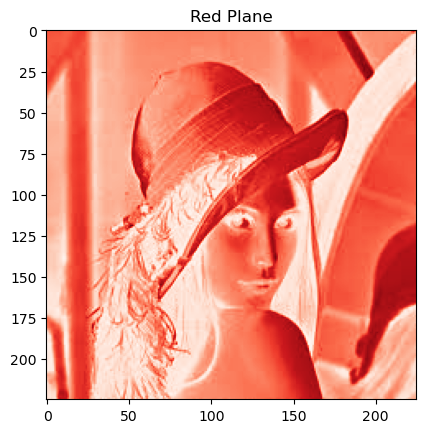

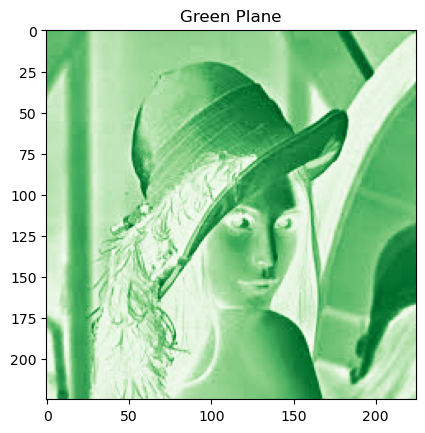

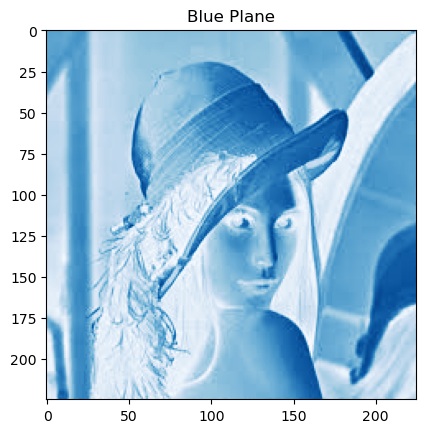

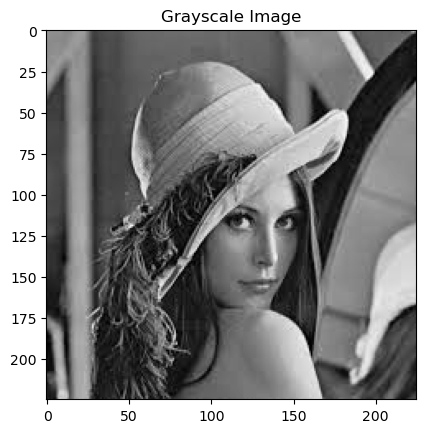

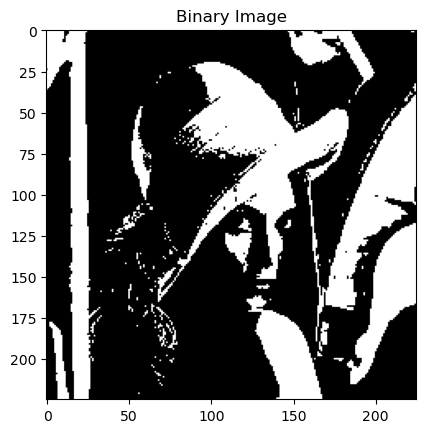

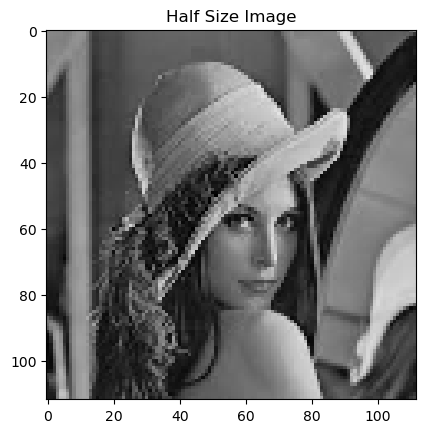

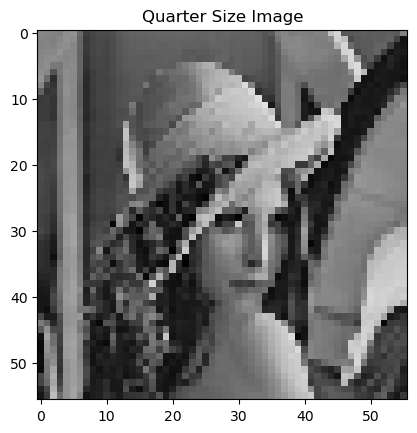

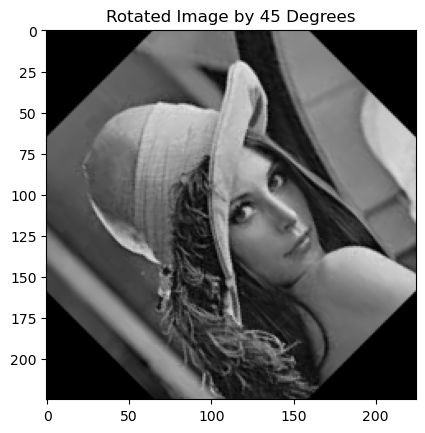

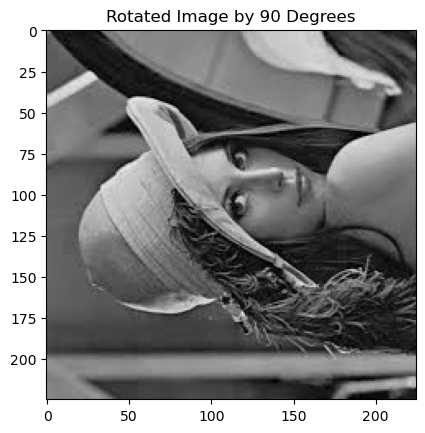

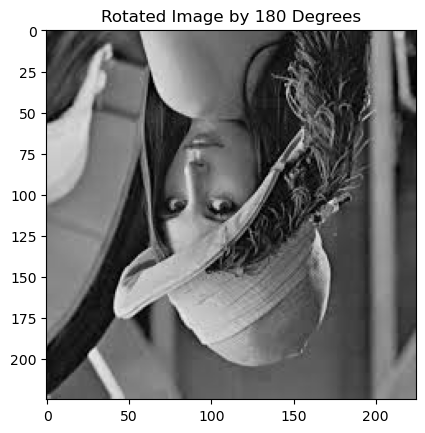

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_with_description(description, image, cmap=None):
    plt.figure()
    plt.title(description)
    if cmap:
        plt.imshow(image, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('on')  # Turn on the axes
    plt.show()

# a.READ,DISPLAY AND WRITE an image
image = cv2.imread('Lena.jpg')  # Replace 'input_image.jpg' with your image file

display_with_description('Original Image', image)

cv2.imwrite('output_image.png', image)

#B. Find RED, GREEN, and BLUE planes
blue, green, red = cv2.split(image)

display_with_description('Red Plane', red, cmap='Reds')
display_with_description('Green Plane', green, cmap='Greens')
display_with_description('Blue Plane', blue, cmap='Blues')

# c.Convert color image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_with_description('Grayscale Image', gray_image, cmap='gray')

# Convert grayscale image to binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
display_with_description('Binary Image', binary_image, cmap='gray')

# d.Resize the image to half and quarter
half_size = cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2))
quarter_size = cv2.resize(image, (image.shape[1] // 4, image.shape[0] // 4))

display_with_description('Half Size Image', half_size)
display_with_description('Quarter Size Image', quarter_size)

#e. Rotate the image by 45, 90, and 180 degrees
def rotate_image(image, angle):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, matrix, (width, height))
    return rotated_image

rotate_45 = rotate_image(image, 45)
rotate_90 = rotate_image(image, 90)
rotate_180 = rotate_image(image, 180)

display_with_description('Rotated Image by 45 Degrees', rotate_45)
display_with_description('Rotated Image by 90 Degrees', rotate_90)
display_with_description('Rotated Image by 180 Degrees', rotate_180)

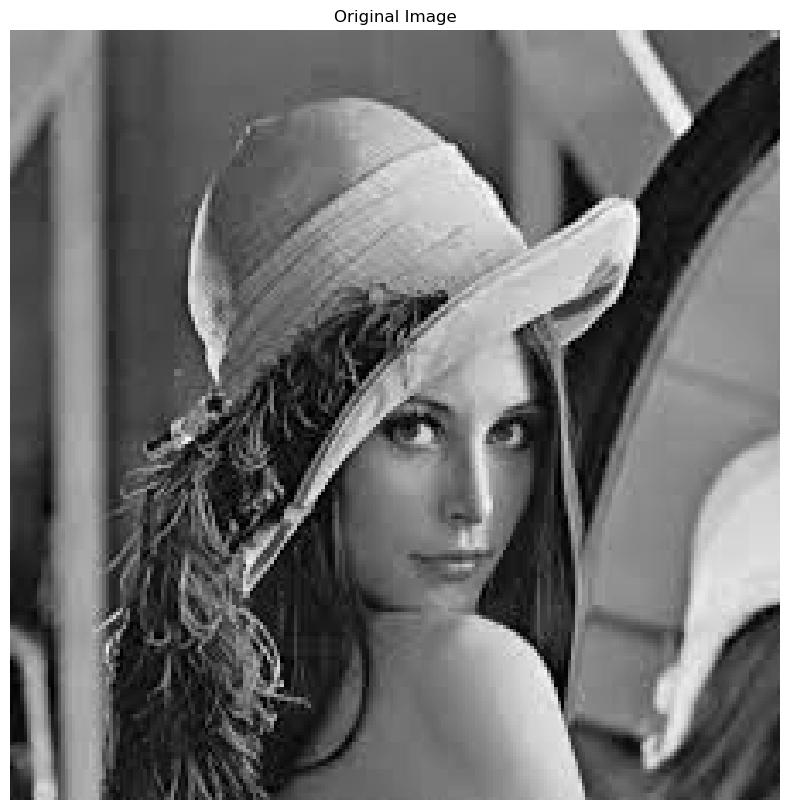

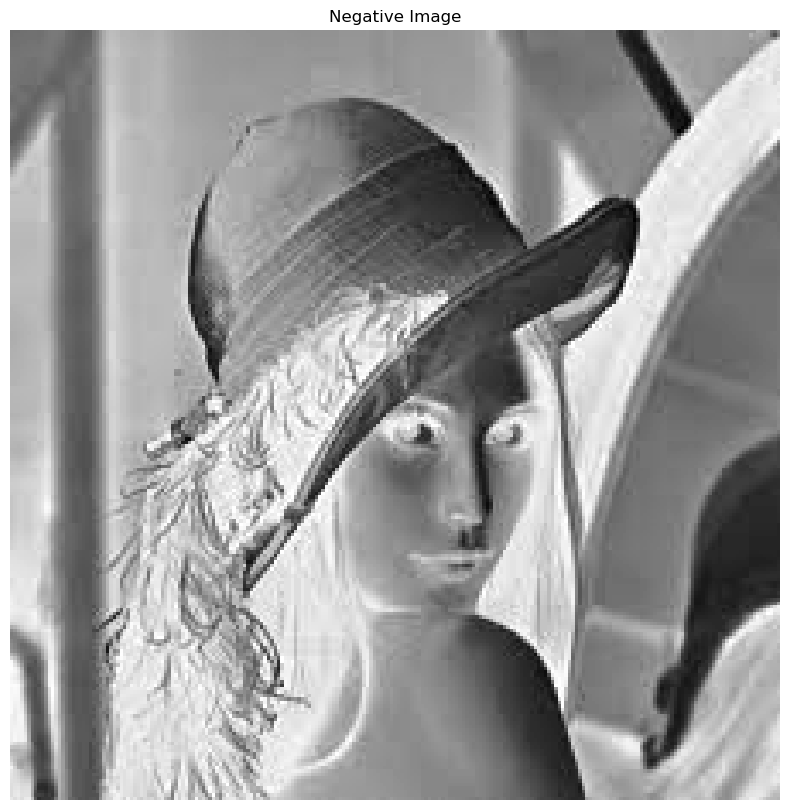

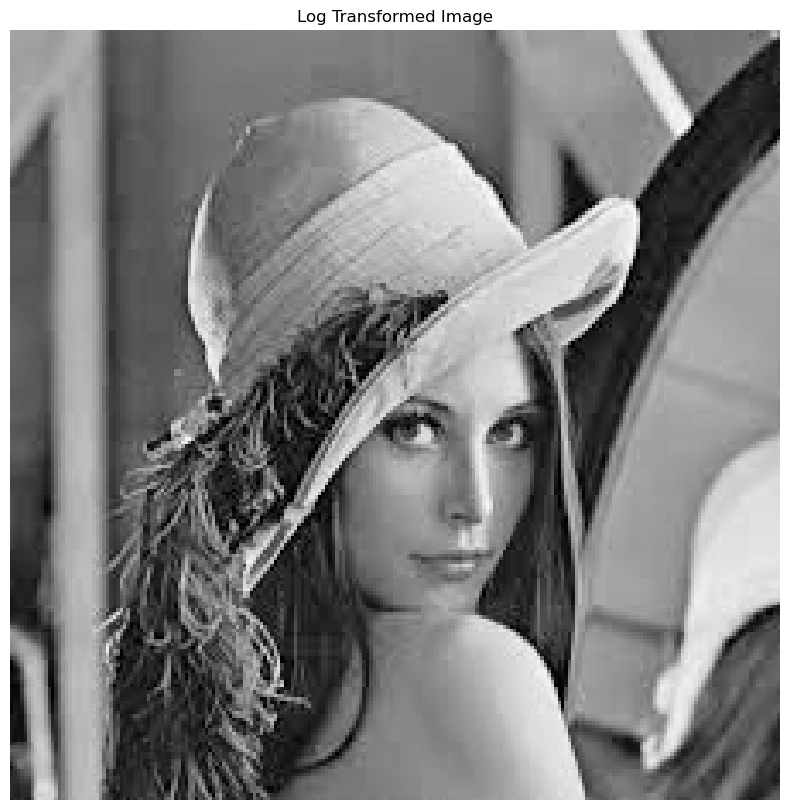

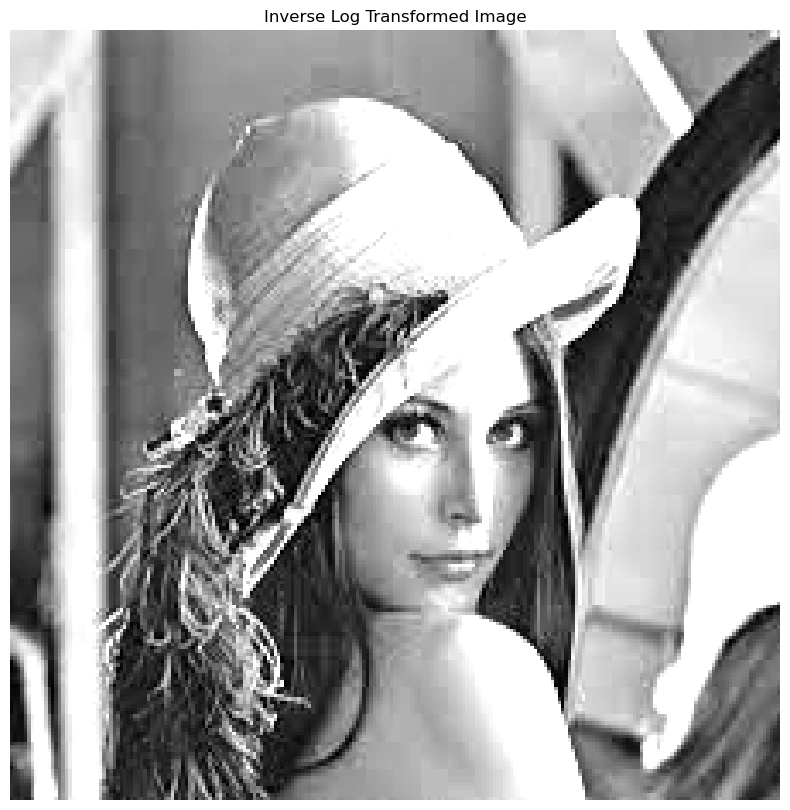

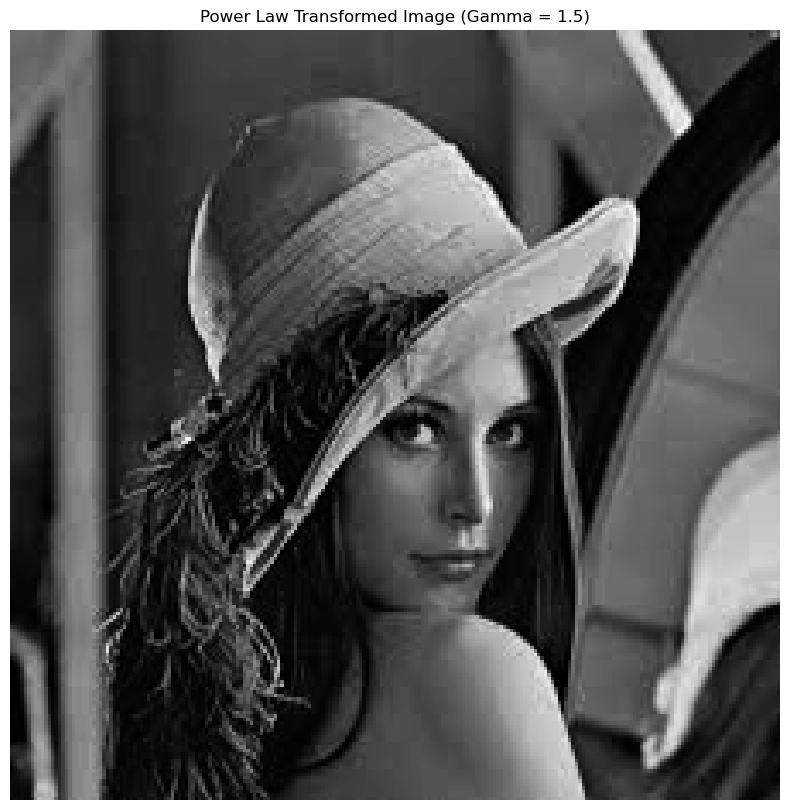

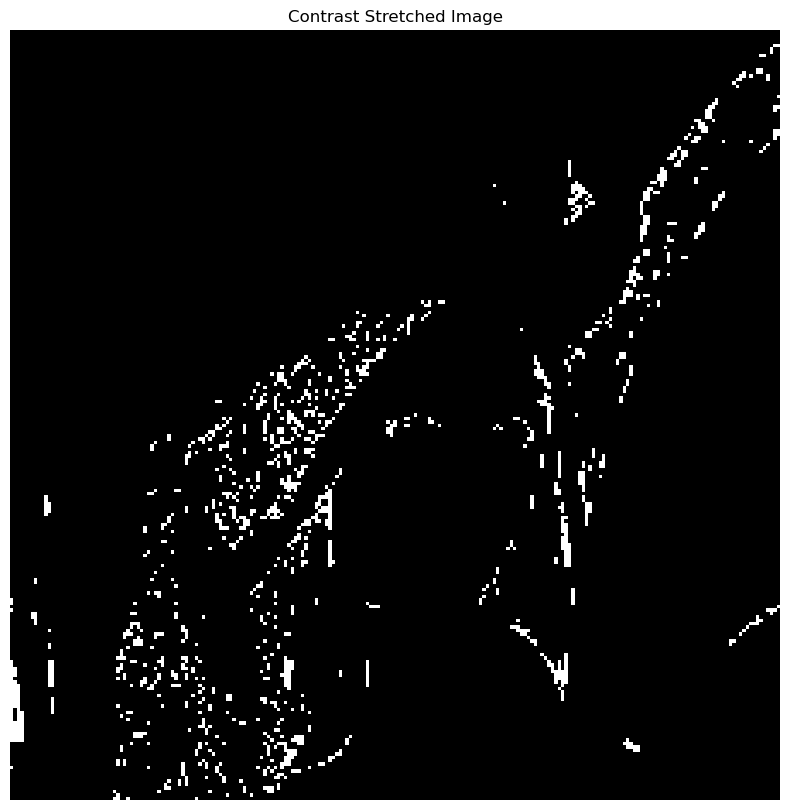

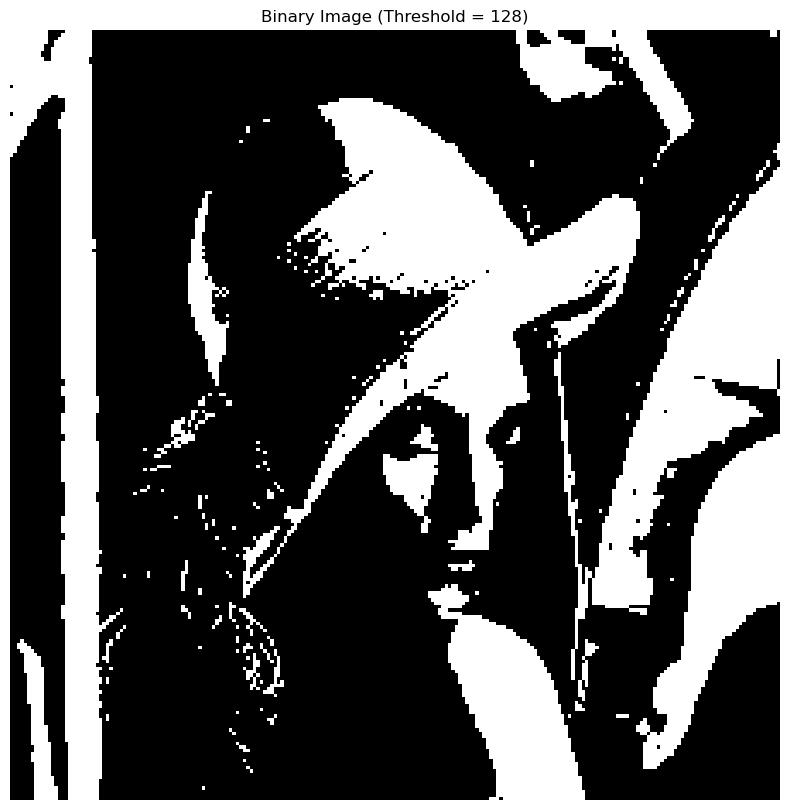

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the image
path = "C:/Users/kavit/Lena.jpg"

# Read the image in grayscale
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(f"Image file at path {path} not found or cannot be opened.")

# Display the original image
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap="gray")
plt.title('Original Image')
plt.axis('off')
plt.show()

# Image Negative
negative_img = 255 - img
plt.figure(figsize=(10, 10))
plt.imshow(negative_img, cmap="gray")
plt.title('Negative Image')
plt.axis('off')
plt.show()

# Log Transformation and Inverse Log Transformation
log_img = np.log1p(img / 255.0)  # Use log1p for log(1+x) to avoid issues with log(0)
log_img = np.uint8(255 * (log_img / np.max(log_img)))  # Normalize to 0-255
plt.figure(figsize=(10, 10))
plt.imshow(log_img, cmap="gray")
plt.title("Log Transformed Image")
plt.axis('off')
plt.show()

inverse_log_img = np.expm1(log_img / 255.0)  # Use expm1 for exp(x) - 1
inverse_log_img = np.uint8(np.clip(inverse_log_img * 255, 0, 255))
plt.figure(figsize=(10, 10))
plt.imshow(inverse_log_img, cmap="gray")
plt.title("Inverse Log Transformed Image")
plt.axis('off')
plt.show()

# Power Law Transformation
gamma = 1.5
power_law_img = np.power(img / 255.0, gamma) * 255
power_law_img = np.uint8(np.clip(power_law_img, 0, 255))
plt.figure(figsize=(10, 10))
plt.imshow(power_law_img, cmap="gray")
plt.title(f'Power Law Transformed Image (Gamma = {gamma})')
plt.axis('off')
plt.show()

# Contrast Stretching
min_val = np.min(img)
max_val = np.max(img)
stretched_img = np.clip((img - min_val) * 255 / (max_val - min_val), 0, 255).astype(np.uint8)
plt.figure(figsize=(10, 10))
plt.imshow(stretched_img, cmap="gray")
plt.title("Contrast Stretched Image")
plt.axis('off')
plt.show()

# Gray Level Slicing
threshold = 128
binary_img = np.where(img > threshold, 255, 0).astype(np.uint8)
plt.figure(figsize=(10, 10))
plt.imshow(binary_img, cmap='gray')
plt.title(f'Binary Image (Threshold = {threshold})')
plt.axis('off')
plt.show()


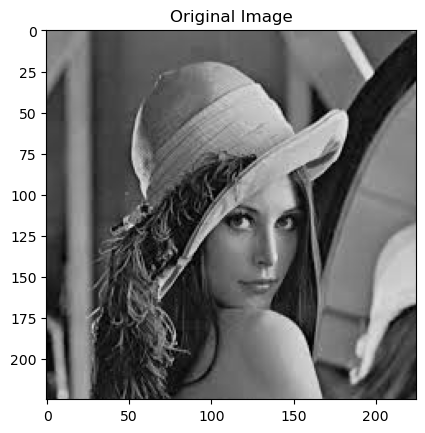

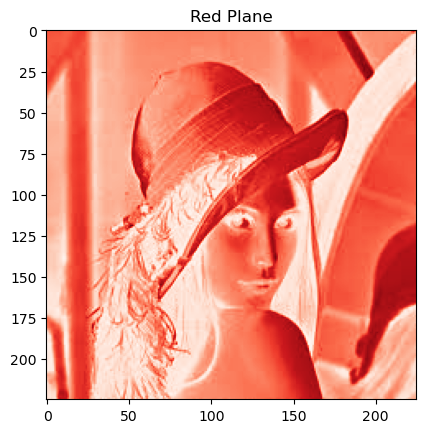

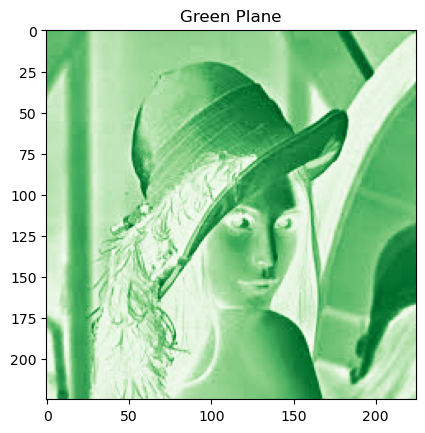

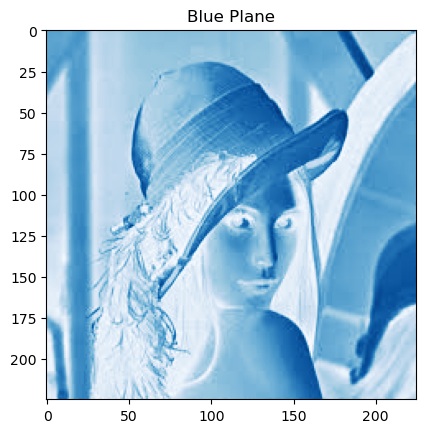

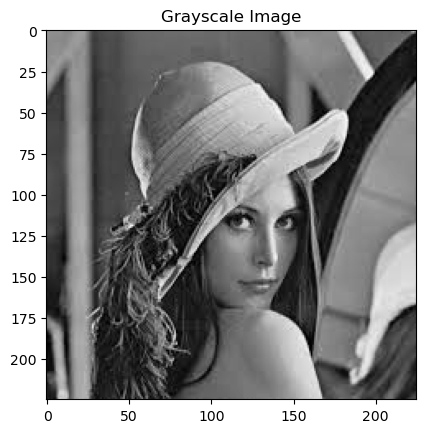

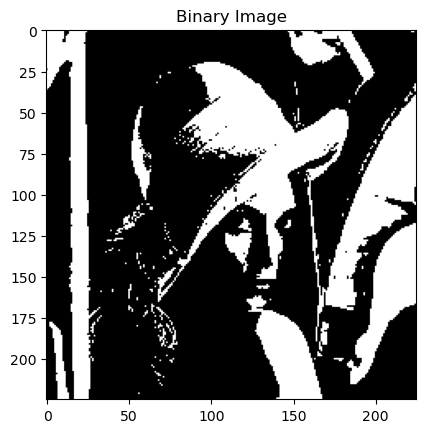

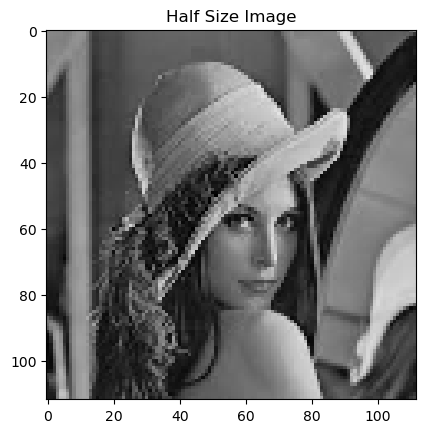

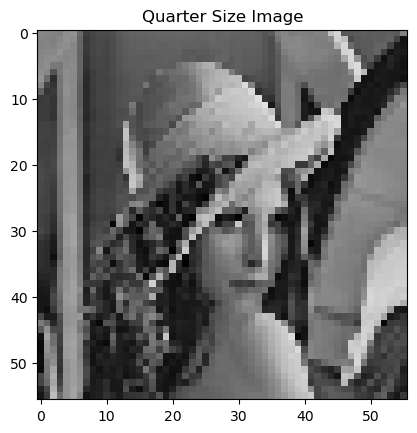

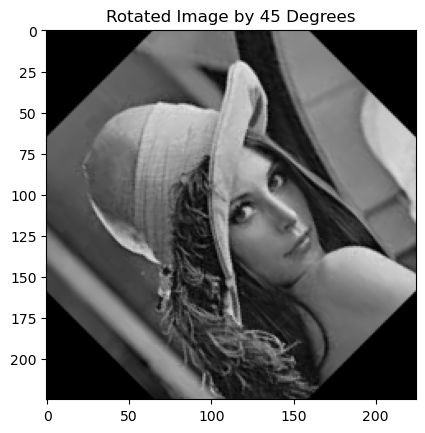

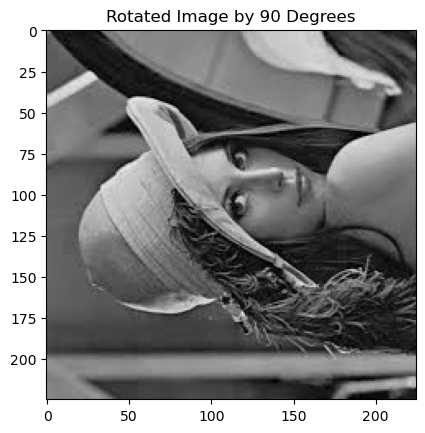

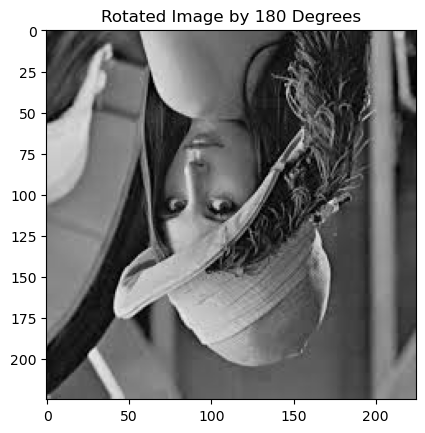

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images with descriptions using Matplotlib
def display_with_description(description, image, cmap=None):
    plt.figure()
    plt.title(description)
    if cmap:
        plt.imshow(image, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('on')  # Turn on the axes
    plt.show()

# Read an image
image = cv2.imread('Lena.jpg')  # Replace 'input_image.jpg' with your image file

# Display the original image
display_with_description('Original Image', image)

# Write the image in another format (e.g., PNG)
cv2.imwrite('output_image.png', image)

# Find RED, GREEN, and BLUE planes
blue, green, red = cv2.split(image)

display_with_description('Red Plane', red, cmap='Reds')
display_with_description('Green Plane', green, cmap='Greens')
display_with_description('Blue Plane', blue, cmap='Blues')

# Convert color image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_with_description('Grayscale Image', gray_image, cmap='gray')

# Convert grayscale image to binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
display_with_description('Binary Image', binary_image, cmap='gray')

# Resize the image to half and quarter
half_size = cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2))
quarter_size = cv2.resize(image, (image.shape[1] // 4, image.shape[0] // 4))

display_with_description('Half Size Image', half_size)
display_with_description('Quarter Size Image', quarter_size)

# Rotate the image by 45, 90, and 180 degrees
def rotate_image(image, angle):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, matrix, (width, height))
    return rotated_image

rotate_45 = rotate_image(image, 45)
rotate_90 = rotate_image(image, 90)
rotate_180 = rotate_image(image, 180)

display_with_description('Rotated Image by 45 Degrees', rotate_45)
display_with_description('Rotated Image by 90 Degrees', rotate_90)
display_with_description('Rotated Image by 180 Degrees', rotate_180)

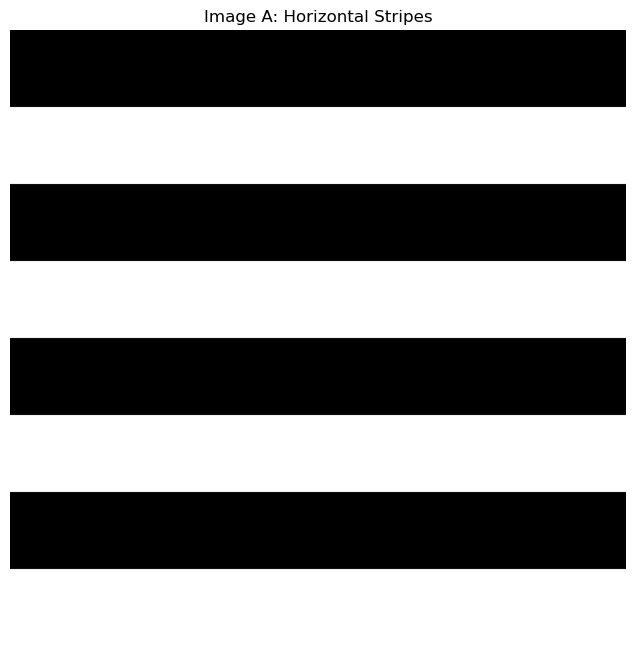

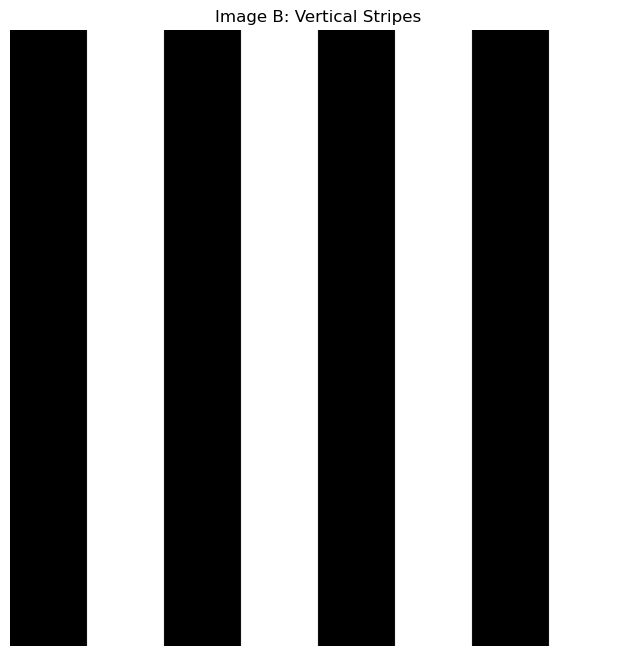

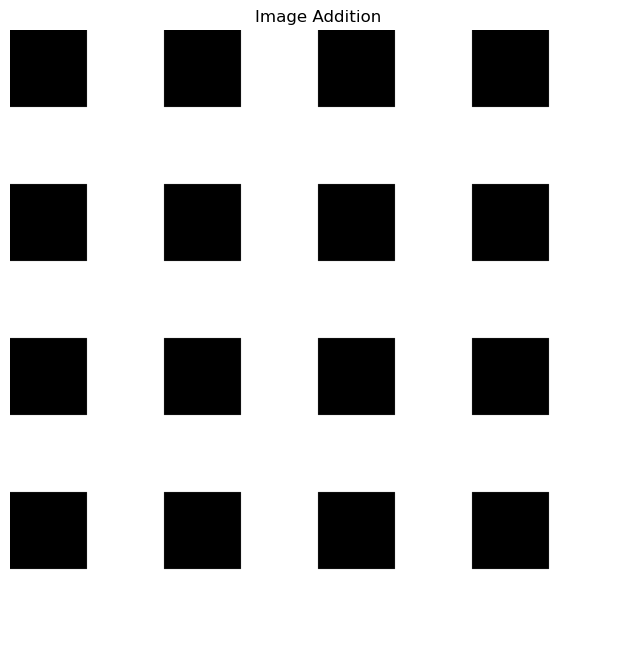

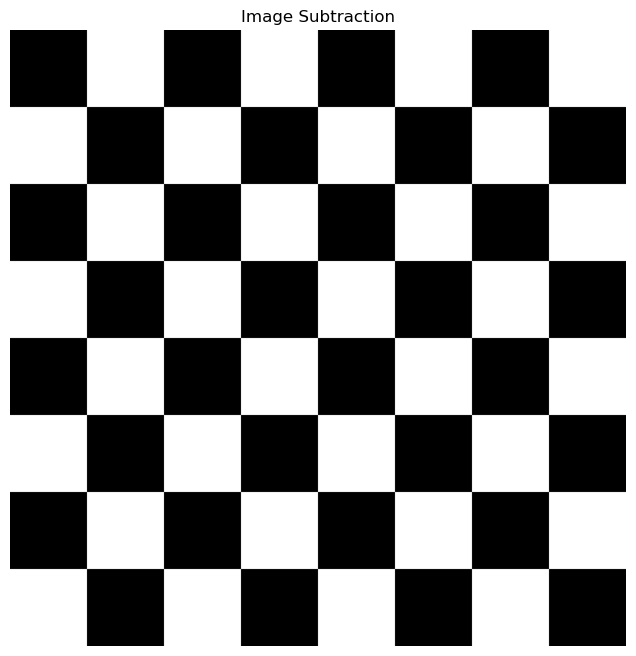

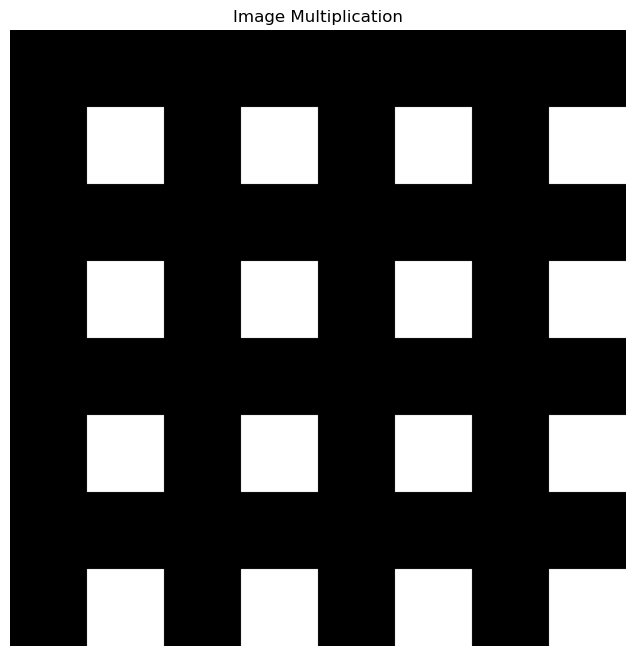

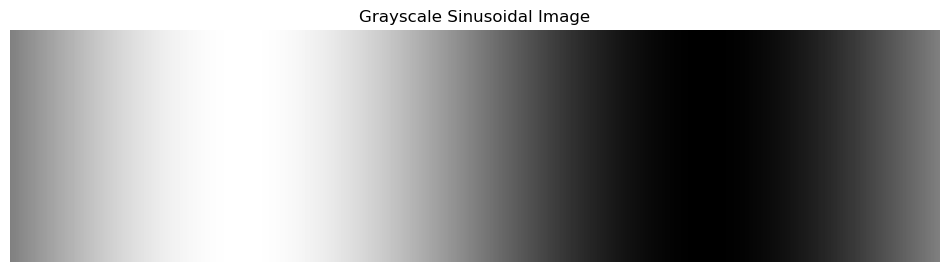

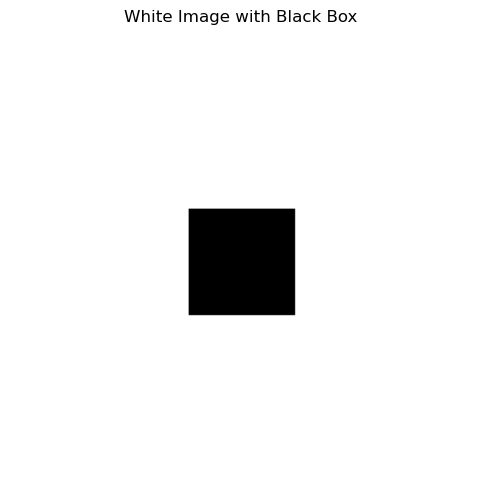

In [5]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

# a. Create Image A: Horizontal stripes of black and white
width, height = 1024, 1024
stripe_height = 128

# Create Image A
img_a = Image.new('1', (width, height), color=1)  # White background
pixels_a = img_a.load()

# Fill image with horizontal stripes
for y in range(0, height, stripe_height):
    color = 0 if (y // stripe_height) % 2 == 0 else 1
    for x in range(width):
        for dy in range(stripe_height):
            if y + dy < height:
                pixels_a[x, y + dy] = color

img_a.save('image_a.png')

# Display Image A
plt.figure(figsize=(8, 8))
plt.imshow(img_a, cmap='gray')
plt.title('Image A: Horizontal Stripes')
plt.axis('off')
plt.show()

# b. Create Image B: Vertical stripes of black and white
stripe_width = 128

# Create Image B
img_b = Image.new('1', (width, height), color=1)  # White background
pixels_b = img_b.load()

# Fill image with vertical stripes
for x in range(0, width, stripe_width):
    color = 0 if (x // stripe_width) % 2 == 0 else 1
    for y in range(height):
        for dx in range(stripe_width):
            if x + dx < width:
                pixels_b[x + dx, y] = color

img_b.save('image_b.png')

# Display Image B
plt.figure(figsize=(8, 8))
plt.imshow(img_b, cmap='gray')
plt.title('Image B: Vertical Stripes')
plt.axis('off')
plt.show()

# c. Perform Image Operations

# Convert images to numpy arrays (uint8)
pixels_a = np.array(img_a, dtype=np.uint8)
pixels_b = np.array(img_b, dtype=np.uint8)

# a. Image addition
result_add = np.clip(pixels_a + pixels_b, 0, 1)  # Add and clip to 0 or 1
result_add_img = Image.fromarray(result_add.astype(np.uint8) * 255)  # Convert to uint8 and scale to 0-255
result_add_img.save('image_add.png')

# Display Image Addition
plt.figure(figsize=(8, 8))
plt.imshow(result_add_img, cmap='gray')
plt.title('Image Addition')
plt.axis('off')
plt.show()

# b. Image subtraction
result_sub = np.clip(pixels_a - pixels_b, 0, 1)  # Subtract and clip to 0 or 1
result_sub_img = Image.fromarray(result_sub.astype(np.uint8) * 255)  # Convert to uint8 and scale to 0-255
result_sub_img.save('image_sub.png')

# Display Image Subtraction
plt.figure(figsize=(8, 8))
plt.imshow(result_sub_img, cmap='gray')
plt.title('Image Subtraction')
plt.axis('off')
plt.show()

# c. Image multiplication
result_mul = np.clip(pixels_a * pixels_b, 0, 1)  # Multiply and clip to 0 or 1
result_mul_img = Image.fromarray(result_mul.astype(np.uint8) * 255)  # Convert to uint8 and scale to 0-255
result_mul_img.save('image_mul.png')

# Display Image Multiplication
plt.figure(figsize=(8, 8))
plt.imshow(result_mul_img, cmap='gray')
plt.title('Image Multiplication')
plt.axis('off')
plt.show()

# d. Create a grayscale image with sinusoidal intensity variation
height_g, width_g = 256, 1024
x = np.linspace(0, 2 * np.pi, width_g)
y = np.linspace(0, 1, height_g)
X, Y = np.meshgrid(x, y)
Z = (np.sin(X) + 1) / 2 * 255  # Sinusoidal pattern scaled to 0-255

# Convert to image
img_sinusoidal = Image.fromarray(Z.astype(np.uint8))
img_sinusoidal = img_sinusoidal.transpose(Image.FLIP_TOP_BOTTOM)  # Adjust to match desired orientation
img_sinusoidal.save('sinusoidal_image.png')

# Display Grayscale Sinusoidal Image
plt.figure(figsize=(12, 6))
plt.imshow(img_sinusoidal, cmap='gray')
plt.title('Grayscale Sinusoidal Image')
plt.axis('off')
plt.show()

# e. Create a white image with a black box at the center
size = 256
box_size = 58
box_start = (size - box_size) // 2

# Create a white image
img_white_box = Image.new('1', (size, size), color=1)
draw = ImageDraw.Draw(img_white_box)
draw.rectangle([box_start, box_start, box_start + box_size, box_start + box_size], fill=0)  # Draw black box

img_white_box.save('white_image_with_black_box.png')

# Display Image with Black Box
plt.figure(figsize=(6, 6))
plt.imshow(img_white_box, cmap='gray')
plt.title('White Image with Black Box')
plt.axis('off')
plt.show()

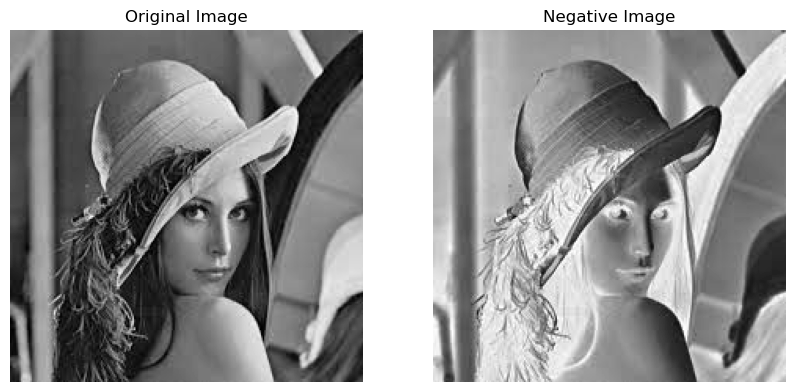

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
image = cv2.imread('Lena.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if image is None:
    raise ValueError("Image not found or the path is incorrect.")

# Image negative transformation
negative_image = 255 - image

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Negative Image')
plt.imshow(negative_image, cmap='gray')
plt.axis('off')

plt.show()


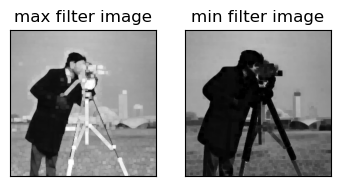

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img=cv2.imread('cameraman.jpg')
img_blur=cv2.blur(img,[5,4])

kernel=np.ones([5,5],dtype=float)/25
img_blur2=cv2.filter2D(img, -1, kernel)

max_filter=cv2.dilate(img,np.ones((5,5),np.uint8))
min_filter=cv2.erode(img,np.ones((5,5),np.uint8))

plt.subplot(2,3,1)
plt.imshow(max_filter)
plt.xticks([]),plt.yticks([])
plt.title("max filter image")
plt.subplot(2,3,2)
plt.imshow(min_filter)
plt.xticks([]),plt.yticks([])
plt.title("min filter image")

plt.show()




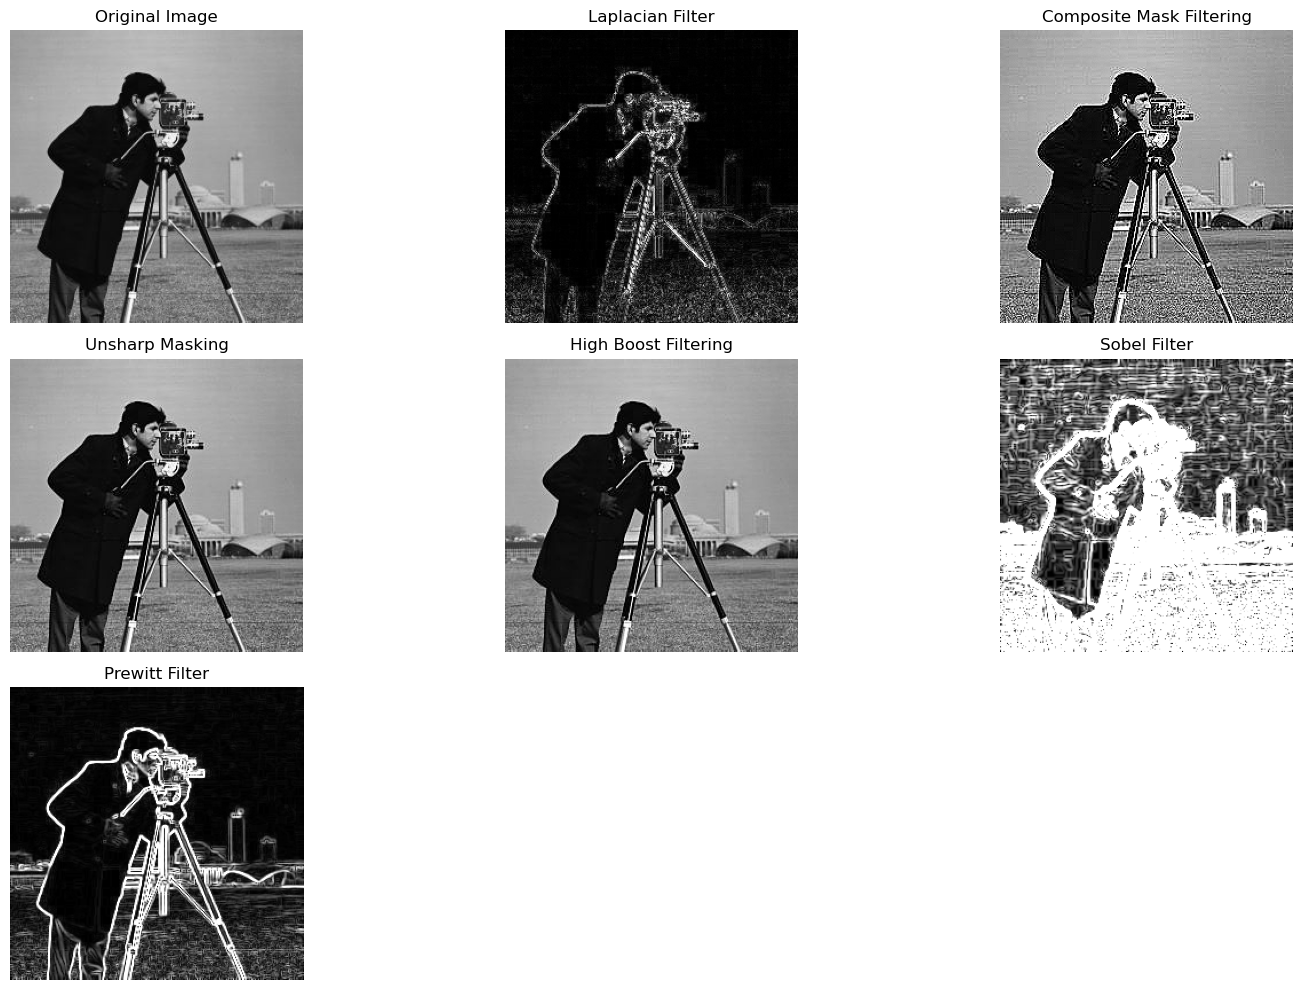

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('cameraman.jpg')

laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

composite_mask = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])
filtered_image = cv2.filter2D(image, -1, composite_mask)

blurred = cv2.GaussianBlur(image, (5, 5), 0)
unsharp_image = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

high_boost = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

prewitt_x = np.array([[1, 0, -1],
                      [1, 0, -1],
                      [1, 0, -1]], dtype=np.float32)

prewitt_y = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]], dtype=np.float32)

prewitt_filtered_x = cv2.filter2D(image.astype(np.float32), -1, prewitt_x)
prewitt_filtered_y = cv2.filter2D(image.astype(np.float32), -1, prewitt_y)
prewitt_combined = cv2.magnitude(prewitt_filtered_x, prewitt_filtered_y)
prewitt_combined = cv2.convertScaleAbs(prewitt_combined)

plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(laplacian)
plt.title("Laplacian Filter")
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(filtered_image)
plt.title("Composite Mask Filtering")
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(unsharp_image)
plt.title("Unsharp Masking")
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(high_boost)
plt.title("High Boost Filtering")
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(sobel_combined)
plt.title("Sobel Filter")
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(prewitt_combined)
plt.title("Prewitt Filter")
plt.axis('off')

plt.tight_layout()
plt.show()


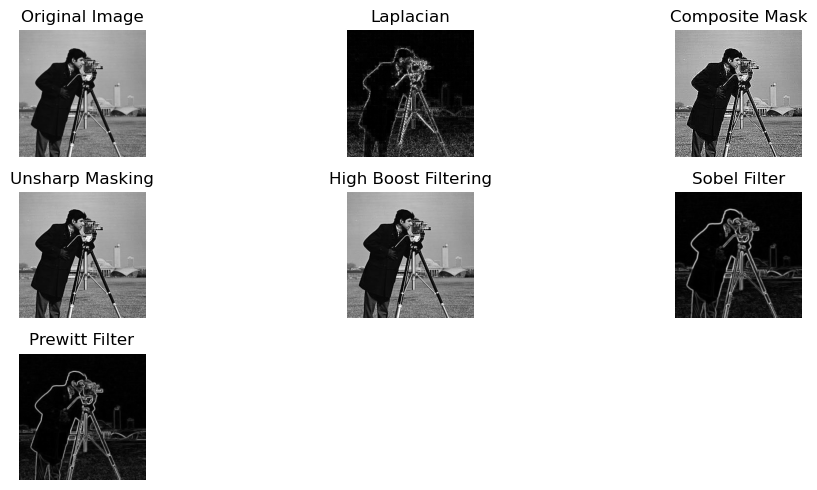

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('cameraman.jpg')

laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

composite_mask = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])
filtered_image = cv2.filter2D(image, -1, composite_mask)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
unsharp_image = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
high_boost = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_mask = cv2.magnitude(sobel_x, sobel_y)

sobel_mask = cv2.normalize(sobel_mask, None, 0, 255, cv2.NORM_MINMAX)
sobel_mask = cv2.convertScaleAbs(sobel_mask)

prewitt_x = np.array([[1, 0, -1],
                      [1, 0, -1],
                      [1, 0, -1]], dtype=np.float32)

prewitt_y = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]], dtype=np.float32)

prewitt_filtered_x = cv2.filter2D(image.astype(np.float32), -1, prewitt_x)
prewitt_filtered_y = cv2.filter2D(image.astype(np.float32), -1, prewitt_y)
prewitt_mask = cv2.magnitude(prewitt_filtered_x, prewitt_filtered_y)

prewitt_mask = cv2.normalize(prewitt_mask, None, 0, 255, cv2.NORM_MINMAX)
prewitt_mask = cv2.convertScaleAbs(prewitt_mask)

plt.figure(figsize=(10, 5))

plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(3, 3, 2)
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian")
plt.axis('off')
plt.subplot(3, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title("Composite Mask")
plt.axis('off')
plt.subplot(3, 3, 4)
plt.imshow(unsharp_image, cmap='gray')
plt.title("Unsharp Masking")
plt.axis('off')
plt.subplot(3, 3, 5)
plt.imshow(high_boost, cmap='gray')
plt.title("High Boost Filtering")
plt.axis('off')
plt.subplot(3, 3, 6)
plt.imshow(sobel_mask, cmap='gray')
plt.title("Sobel Filter")
plt.axis('off')
plt.subplot(3, 3, 7)
plt.imshow(prewitt_mask, cmap='gray')
plt.title("Prewitt Filter")
plt.axis('off')

plt.tight_layout()
plt.show()


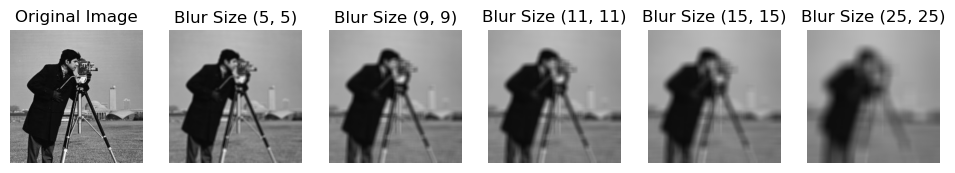

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('cameraman.jpg')
blur_sizes = [(5, 5), (9, 9), (11, 11), (15, 15), (25, 25)]
plt.figure(figsize=(12, 10))

# Display the original image
plt.subplot(1, len(blur_sizes) + 1, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Apply and display blurred images
for i, size in enumerate(blur_sizes):
    img_blur = cv2.blur(img, size)
    plt.subplot(1, len(blur_sizes) + 1, i + 2)
    plt.imshow(img_blur)
    plt.title(f'Blur Size {size}')
    plt.axis('off')

plt.show()


In [ ]:
import cv2
import numpy as np

# Read the grayscale image
image = cv2.imread('cameraman.jpg',cv2.IMREAD_GRAYSCALE)

# a. Laplacian Filter
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)
cv2.imwrite('laplacian.jpg', laplacian)

# b. Filtering Using Composite Mask
composite_mask = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])
filtered_image = cv2.filter2D(image, -1, composite_mask)
cv2.imwrite('composite_mask.jpg', filtered_image)

# c. Unsharp Masking
blurred = cv2.GaussianBlur(image, (5, 5), 0)
unsharp_image = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
cv2.imwrite('unsharp_masking.jpg', unsharp_image)

# d. High Boost Filtering
high_boost = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
cv2.imwrite('high_boost_filtering.jpg', high_boost)

# e. Filtering Using First Order Derivative Operators (Sobel and Prewitt)

# Sobel Filter
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)
cv2.imwrite('sobel_filter.jpg', sobel_combined)

# Prewitt Filter
prewitt_x = np.array([[1, 0, -1],
                      [1, 0, -1],
                      [1, 0, -1]], dtype=np.float32)

prewitt_y = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]], dtype=np.float32)

prewitt_filtered_x = cv2.filter2D(image.astype(np.float32), -1, prewitt_x)
prewitt_filtered_y = cv2.filter2D(image.astype(np.float32), -1, prewitt_y)

prewitt_combined = cv2.magnitude(prewitt_filtered_x, prewitt_filtered_y)
prewitt_combined = cv2.convertScaleAbs(prewitt_combined)
cv2.imwrite('prewitt_filter.jpg', prewitt_combined)


cv2.imshow('Laplacian Filter', laplacian)
cv2.imshow('Composite Mask Filtering', filtered_image)
cv2.imshow('Unsharp Masking', unsharp_image)
cv2.imshow('High Boost Filtering', high_boost)
cv2.imshow('Sobel Filter', sobel_combined)
cv2.imshow('Prewitt Filter', prewitt_combined)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

def adaptive_histogram_equalisation(input_Image, clip_limit=2.0, tile_grid_size=(8, 8)):
    
    gray_image = cv2.cvtColor(input_Image, cv2.COLOR_BGR2GRAY)

    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)

    # Apply the CLAHE object to the grayscale image to get the equalized image
    equalized_image = clahe.apply(gray_image)

    # Convert the equalized image back to color
    enhanced_image = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)

    return enhanced_image

input_Image = cv2.imread('cameraman.jpg')


enhanced_Image = adaptive_histogram_equalisation(input_Image)

cv2.namedWindow('Original and Enhanced Images', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Original and Enhanced Images', 1200, 600)

cv2.imshow('Original and Enhanced Images', np.hstack((input_Image, enhanced_Image)))

# Wait for a key press and close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def histogram_equalisation(input_Image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(input_Image, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(gray_image)
    
    # Convert the equalized image back to color
    enhanced_image = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)
    
    return enhanced_image

# Specify the image path
image_path = 'cameraman.jpg'

# Check if the image file exists
if not os.path.exists(image_path):
    print("File does not exist. Please check the path.")
else:
    # Read the input image
    input_Image = cv2.imread(image_path)

    # Apply histogram equalization
    enhanced_Image = histogram_equalisation(input_Image)

    # Set up the matplotlib subplot
    plt.figure(figsize=(12, 6))

    # Show original image
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(input_Image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Show enhanced image
    plt.subplot(1, 2, 2)
    plt.title('Enhanced Image')
    plt.imshow(cv2.cvtColor(enhanced_Image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Display the images
    plt.tight_layout()
    plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalisation(input_Image, no_of_bins=256):
    gray_image = cv2.cvtColor(input_Image, cv2.COLOR_BGR2GRAY)
    equalized_image = cv2.equalizeHist(gray_image)
    
    enhanced_image = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)
    return enhanced_image

image_path = 'cameraman.jpg'
input_Image = cv2.imread(image_path)

if input_Image is None:
    print("Error: Could not load image. Check the file path.")
else:
    enhanced_Image = histogram_equalisation(input_Image)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(input_Image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title('Enhanced Image')
    plt.imshow(cv2.cvtColor(enhanced_Image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def histogram_equalisation(input_Image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(input_Image, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(gray_image)
    
    # Convert the equalized image back to color
    enhanced_image = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)
    
    return enhanced_image

# Specify the image path
image_path = 'cameraman.jpg'

# Check if the image file exists
if not os.path.exists(image_path):
    print("File does not exist. Please check the path.")
else:
    # Read the input image
    input_Image = cv2.imread(image_path)

    # Apply histogram equalization
    enhanced_Image = histogram_equalisation(input_Image)

    # Set up the matplotlib subplot
    plt.figure(figsize=(12, 6))

    # Show original image
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(input_Image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Show enhanced image
    plt.subplot(1, 2, 2)
    plt.title('Enhanced Image')
    plt.imshow(cv2.cvtColor(enhanced_Image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Display the images
    plt.tight_layout()
    plt.show()


In [ ]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

# a. Create Image A: Horizontal stripes of black and white
width, height = 1024, 1024
stripe_height = 128

img_a = Image.new('1', (width, height), color=1) 
pixels_a = img_a.load()

for y in range(0, height, stripe_height):
    color = 0 if (y // stripe_height) % 2 == 0 else 1
    for x in range(width):
        for dy in range(stripe_height):
            if y + dy < height:
                pixels_a[x, y + dy] = color

img_a.save('image_a.png')

plt.figure(figsize=(8, 8))
plt.imshow(img_a, cmap='gray')
plt.title('Image A: Horizontal Stripes')
plt.axis('off')
plt.show()

stripe_width = 128

img_b = Image.new('1', (width, height), color=1)  
pixels_b = img_b.load()

for x in range(0, width, stripe_width):
    color = 0 if (x // stripe_width) % 2 == 0 else 1
    for y in range(height):
        for dx in range(stripe_width):
            if x + dx < width:
                pixels_b[x + dx, y] = color

img_b.save('image_b.png')

plt.figure(figsize=(8, 8))
plt.imshow(img_b, cmap='gray')
plt.title('Image B: Vertical Stripes')
plt.axis('off')
plt.show()

pixels_a = np.array(img_a, dtype=np.uint8)
pixels_b = np.array(img_b, dtype=np.uint8)

# a. Image addition
result_add = np.clip(pixels_a + pixels_b, 0, 1)  
result_add_img = Image.fromarray(result_add.astype(np.uint8) * 255) 
result_add_img.save('image_add.png')
n
plt.figure(figsize=(8, 8))
plt.imshow(result_add_img, cmap='gray')
plt.title('Image Addition')
plt.axis('off')
plt.show()

# b. Image subtraction
result_sub = np.clip(pixels_a - pixels_b, 0, 1)  
result_sub_img = Image.fromarray(result_sub.astype(np.uint8) * 255)  
result_sub_img.save('image_sub.png')

plt.figure(figsize=(8, 8))
plt.imshow(result_sub_img, cmap='gray')
plt.title('Image Subtraction')
plt.axis('off')
plt.show()

# c. Image multiplication
result_mul = np.clip(pixels_a * pixels_b, 0, 1)  
result_mul_img = Image.fromarray(result_mul.astype(np.uint8) * 255) 
result_mul_img.save('image_mul.png')

plt.figure(figsize=(8, 8))
plt.imshow(result_mul_img, cmap='gray')
plt.title('Image Multiplication')
plt.axis('off')
plt.show()

# d. Create a grayscale image with sinusoidal intensity variation
height_g, width_g = 256, 1024
x = np.linspace(0, 2 * np.pi, width_g)
y = np.linspace(0, 1, height_g)
X, Y = np.meshgrid(x, y)
Z = (np.sin(X) + 1) / 2 * 255  # Sinusoidal pattern scaled to 0-255

img_sinusoidal = Image.fromarray(Z.astype(np.uint8))
img_sinusoidal = img_sinusoidal.transpose(Image.FLIP_TOP_BOTTOM)  # Adjust to match desired orientation
img_sinusoidal.save('sinusoidal_image.png')

plt.figure(figsize=(12, 6))
plt.imshow(img_sinusoidal, cmap='gray')
plt.title('Grayscale Sinusoidal Image')
plt.axis('off')
plt.show()

# e. Create a white image with a black box at the center
size = 256
box_size = 58
box_start = (size - box_size) // 2

img_white_box = Image.new('1', (size, size), color=1)
draw = ImageDraw.Draw(img_white_box)
draw.rectangle([box_start, box_start, box_start + box_size, box_start + box_size], fill=0)  # Draw black box

img_white_box.save('white_image_with_black_box.png')

plt.figure(figsize=(6, 6))
plt.imshow(img_white_box, cmap='gray')
plt.title('White Image with Black Box')
plt.axis('off')
plt.show()